In [1]:
import os

def print_directory_tree(root_dir, prefix=""):
    # 현재 디렉토리의 하위 항목들을 가져옴
    entries = [entry for entry in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, entry))]
    entries_count = len(entries)
    
    # 각 항목을 처리
    for index, entry in enumerate(entries):
        connector = "└──" if index == entries_count - 1 else "├──"
        print(f"{prefix}{connector} {entry}")
        
        # 하위 디렉토리가 있는 경우 재귀적으로 호출
        new_prefix = "    " if index == entries_count - 1 else "│   "
        print_directory_tree(os.path.join(root_dir, entry), prefix + new_prefix)

# 실행 예시
root_directory = "GolfBall_data_for_tracking"  # 여기에 탐색할 루트 디렉토리 경로를 입력하세요.
print(root_directory)
print_directory_tree(root_directory)

GolfBall_data_for_tracking
├── train
│   ├── labels
│   └── images
├── valid
│   ├── labels
│   └── images
└── test
    ├── images
    │   ├── Golf_1
    │   ├── Golf_10
    │   ├── Golf_16
    │   ├── Golf_17
    │   ├── Golf_2
    │   ├── Golf_4
    │   ├── Golf_5
    │   └── Golf_8
    └── labels


In [2]:
import os

def print_directory_tree(root_dir, prefix=""):
    # 현재 디렉토리의 하위 항목들을 가져옴
    entries = [entry for entry in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, entry))]
    entries_count = len(entries)
    
    # 각 항목을 처리
    for index, entry in enumerate(entries):
        connector = "└──" if index == entries_count - 1 else "├──"
        print(f"{prefix}{connector} {entry}")
        
        # 하위 디렉토리가 있는 경우 재귀적으로 호출
        new_prefix = "    " if index == entries_count - 1 else "│   "
        print_directory_tree(os.path.join(root_dir, entry), prefix + new_prefix)

# 실행 예시
root_directory = "merged_golfball"  # 여기에 탐색할 루트 디렉토리 경로를 입력하세요.
print(root_directory)
print_directory_tree(root_directory)

merged_golfball
├── test
│   ├── images
│   └── labels
├── train
│   ├── images
│   └── labels
└── valid
    ├── images
    └── labels


- 퍼팅 데이터 삭제

In [9]:
import os

def delete_put_files(base_folder):
    """
    Deletes all .jpg and .txt files containing 'PUT' in their filenames
    from the train and valid folders of the specified base folder.
    """
    # List to keep track of deleted files for confirmation/logging
    file_deleted = []
    
    # Define the paths to train and valid directories
    directories = [os.path.join(base_folder, 'train'), os.path.join(base_folder, 'valid')]
    
    for directory in directories:
        # Check images and labels subfolders
        for subfolder in ['images', 'labels']:
            folder_path = os.path.join(directory, subfolder)
            if os.path.exists(folder_path):
                # Iterate through files in the folder
                for filename in os.listdir(folder_path):
                    if filename.lower().startswith('put') and (filename.endswith('.jpg') or filename.endswith('.txt')):
                        file_path = os.path.join(folder_path, filename)
                        os.remove(file_path)  # Delete the file
                        file_deleted.append(file_path)  # Log the deleted file path
    
    return file_deleted

# Call the function with the specified base folder
base_folder = './GolfBall_data_for_tracking'
deleted_files = delete_put_files(base_folder)

# Print the list of deleted files for verification
cnt = 0
for file in deleted_files:
    cnt += 1

print(f"Deleted files#: {cnt}")

Deleted files#: 382


- merged_golfball 폴더 내의 train, valid, test 데이터를 병합

In [10]:
import os
import shutil

def merge_folders(source_folder):
    """
    주어진 소스 폴더에서 train, valid, test 하위 폴더의 images와 labels 파일을
    각각 하나의 폴더로 병합하는 함수.
    """
    # 병합할 이미지 및 라벨 폴더 경로 설정
    merged_images_folder = os.path.join(source_folder, 'images')  # 병합된 이미지 저장 폴더
    merged_labels_folder = os.path.join(source_folder, 'labels')  # 병합된 라벨 저장 폴더
    
    # 병합된 폴더가 없으면 생성
    os.makedirs(merged_images_folder, exist_ok=True)
    os.makedirs(merged_labels_folder, exist_ok=True)

    # train, valid, test 하위 폴더를 순회하며 파일 복사
    for subfolder in ['train', 'valid', 'test']:
        images_path = os.path.join(source_folder, subfolder, 'images')  # 현재 하위 폴더의 images 경로
        labels_path = os.path.join(source_folder, subfolder, 'labels')  # 현재 하위 폴더의 labels 경로

        # images 폴더가 존재하는 경우 모든 파일 복사
        if os.path.exists(images_path):
            for file in os.listdir(images_path):
                src_file = os.path.join(images_path, file)  # 원본 파일 경로
                dst_file = os.path.join(merged_images_folder, file)  # 대상 파일 경로
                shutil.copy(src_file, dst_file)  # 파일 복사

        # labels 폴더가 존재하는 경우 모든 파일 복사
        if os.path.exists(labels_path):
            for file in os.listdir(labels_path):
                src_file = os.path.join(labels_path, file)  # 원본 파일 경로
                dst_file = os.path.join(merged_labels_folder, file)  # 대상 파일 경로
                shutil.copy(src_file, dst_file)  # 파일 복사

# merge_folders 함수를 호출하여 merged_golfball 폴더 내의 train, valid, test 데이터를 병합
merge_folders('merged_golfball')

- GolfBall_data_for_tracking 폴더에서 train과 valid 데이터를 병합

In [11]:
import os
import shutil

def merge_folders(base_folder):
    """
    GolfBall_data_for_tracking 폴더에서 train과 valid 하위 폴더의 images와 labels 파일을 병합.
    병합된 파일은 base_folder/images와 base_folder/labels에 저장.
    test 폴더는 건드리지 않음.
    """
    # 병합 대상 디렉터리 설정
    merged_images_folder = os.path.join(base_folder, 'images')  # 병합된 이미지 저장 경로
    merged_labels_folder = os.path.join(base_folder, 'labels')  # 병합된 라벨 저장 경로

    # 병합 디렉터리가 없으면 생성
    os.makedirs(merged_images_folder, exist_ok=True)
    os.makedirs(merged_labels_folder, exist_ok=True)

    # train과 valid 폴더를 순회하며 파일 복사
    for subfolder in ['train', 'valid']:
        images_path = os.path.join(base_folder, subfolder, 'images')  # 현재 하위 폴더의 images 경로
        labels_path = os.path.join(base_folder, subfolder, 'labels')  # 현재 하위 폴더의 labels 경로

        # images 폴더가 존재하면 모든 파일 복사
        if os.path.exists(images_path):
            for file in os.listdir(images_path):
                src_file = os.path.join(images_path, file)  # 원본 파일 경로
                dst_file = os.path.join(merged_images_folder, file)  # 대상 파일 경로
                shutil.copy(src_file, dst_file)  # 파일 복사

        # labels 폴더가 존재하면 모든 파일 복사
        if os.path.exists(labels_path):
            for file in os.listdir(labels_path):
                src_file = os.path.join(labels_path, file)  # 원본 파일 경로
                dst_file = os.path.join(merged_labels_folder, file)  # 대상 파일 경로
                shutil.copy(src_file, dst_file)  # 파일 복사

# GolfBall_data_for_tracking 폴더에서 train과 valid 데이터를 병합
merge_folders('GolfBall_data_for_tracking')

- GolfBall_data_for_tracking_new, merged_golfball_new 두 폴더 병합

In [17]:
import os
import shutil

def merge_folders(source_folders, target_folder):
    """
    여러 소스 폴더에서 파일을 타겟 폴더로 병합하는 함수.
    """
    # 타겟 디렉터리가 없으면 생성
    os.makedirs(target_folder, exist_ok=True)

    # 각 소스 폴더를 순회하며 파일 복사
    for source_folder in source_folders:
        if os.path.exists(source_folder):  # 소스 폴더가 존재하는 경우에만 실행
            for file in os.listdir(source_folder):  # 소스 폴더 내 모든 파일 순회
                src_file = os.path.join(source_folder, file)  # 원본 파일 경로
                dst_file = os.path.join(target_folder, file)  # 대상 파일 경로
                shutil.copy(src_file, dst_file)  # 파일 복사

# 소스 폴더 경로 설정
images_source_folders = [
    'GolfBall_data_for_tracking_new/images',
    'merged_golfball_new/images'
]
labels_source_folders = [
    'GolfBall_data_for_tracking_new/labels',
    'merged_golfball_new/labels'
]

# 타겟 폴더 경로 설정
images_target_folder = 'final_merged_golfball_dataset/images'
labels_target_folder = 'final_merged_golfball_dataset/labels'

# 이미지 병합 실행
merge_folders(images_source_folders, images_target_folder)

# 라벨 병합 실행
merge_folders(labels_source_folders, labels_target_folder)

print("Images and labels have been successfully merged!")

Images and labels have been successfully merged!


- final_merged_golfball_dataset 폴더 내에서 labels와 images 폴더의 파일 이름이 일치하는지 확인하고, 일치하지 않는 파일들을 기록

In [18]:
import os

def check_matching_files(base_folder):
    """
    labels 폴더와 images 폴더의 파일 이름이 일치하는지 확인.
    - labels 폴더의 파일은 .txt로 끝나야 함.
    - images 폴더의 파일은 .jpg로 끝나야 함.
    - 두 폴더의 파일 이름(확장자 제외)은 동일해야 함.
    
    일치하지 않는 파일을 기록하여 반환.
    """
    # labels 및 images 폴더 경로 설정
    labels_folder = os.path.join(base_folder, 'labels')
    images_folder = os.path.join(base_folder, 'images')

    # labels 및 images 폴더에서 파일 이름(확장자 제외) 추출
    label_files = set(os.path.splitext(file)[0] for file in os.listdir(labels_folder) if file.endswith('.txt'))
    image_files = set(os.path.splitext(file)[0] for file in os.listdir(images_folder) if file.endswith('.jpg'))

    # 일치하지 않는 파일 찾기
    unmatched_labels = label_files - image_files  # labels에만 있고 images에 없는 파일
    unmatched_images = image_files - label_files  # images에만 있고 labels에 없는 파일

    return unmatched_labels, unmatched_images

# base_folder 설정
base_folder = 'final_merged_golfball_dataset'

# 함수 호출하여 불일치 파일 확인
unmatched_labels, unmatched_images = check_matching_files(base_folder)

# 결과 출력
if unmatched_labels or unmatched_images:
    print("일치하지 않는 파일이 발견되었습니다:")
    
    if unmatched_labels:
        print("\nlabels 폴더에만 존재하는 파일:")
        for file in unmatched_labels:
            print(f"{file}.txt")
    
    if unmatched_images:
        print("\nimages 폴더에만 존재하는 파일:")
        for file in unmatched_images:
            print(f"{file}.jpg")
else:
    print("labels와 images 폴더의 모든 파일이 일치합니다.")

labels와 images 폴더의 모든 파일이 일치합니다.


- final_merged_golfball_dataset 데이터를 train, valid, test로 나누기

In [19]:
import os
import shutil
import random

def split_dataset(base_folder, output_folder, train_ratio=0.85, valid_ratio=0.10, test_ratio=0.05):
    """
    데이터를 train, valid, test로 나누고 각각의 labels와 images 폴더를 생성하여 일치하는 파일을 저장.
    비율은 train:valid:test = 85%:10%:5%.
    """
    # 원본 데이터 경로 설정
    labels_folder = os.path.join(base_folder, 'labels')
    images_folder = os.path.join(base_folder, 'images')

    # 파일 이름(확장자 제외) 추출
    label_files = set(os.path.splitext(file)[0] for file in os.listdir(labels_folder) if file.endswith('.txt'))
    image_files = set(os.path.splitext(file)[0] for file in os.listdir(images_folder) if file.endswith('.jpg'))

    # labels와 images의 파일 이름이 일치하는지 확인
    matched_files = list(label_files & image_files)  # 교집합만 사용

    # 데이터 섞기 (랜덤 분할을 위해)
    random.shuffle(matched_files)

    # 데이터 분할 개수 계산
    total_count = len(matched_files)
    train_count = int(total_count * train_ratio)
    valid_count = int(total_count * valid_ratio)
    
    train_files = matched_files[:train_count]
    valid_files = matched_files[train_count:train_count + valid_count]
    test_files = matched_files[train_count + valid_count:]

    # 출력 폴더 생성 (train, valid, test 각각에 labels와 images 폴더 생성)
    for split in ['train', 'valid', 'test']:
        os.makedirs(os.path.join(output_folder, split, 'labels'), exist_ok=True)
        os.makedirs(os.path.join(output_folder, split, 'images'), exist_ok=True)

    # 파일 복사 함수 정의
    def copy_files(file_list, split):
        for file in file_list:
            # 이미지 파일 복사
            src_image = os.path.join(images_folder, f"{file}.jpg")
            dst_image = os.path.join(output_folder, split, 'images', f"{file}.jpg")
            shutil.copy(src_image, dst_image)

            # 라벨 파일 복사
            src_label = os.path.join(labels_folder, f"{file}.txt")
            dst_label = os.path.join(output_folder, split, 'labels', f"{file}.txt")
            shutil.copy(src_label, dst_label)

    # 각 데이터셋에 파일 복사
    copy_files(train_files, 'train')
    copy_files(valid_files, 'valid')
    copy_files(test_files, 'test')

    print(f"Dataset split completed!")
    print(f"Train: {len(train_files)} files")
    print(f"Valid: {len(valid_files)} files")
    print(f"Test: {len(test_files)} files")

# Base folder와 output folder 설정
base_folder = 'final_merged_golfball_dataset'
output_folder = 'final_split_golfball_dataset'

# 데이터셋 분할 실행
split_dataset(base_folder, output_folder)

Dataset split completed!
Train: 18177 files
Valid: 2138 files
Test: 1070 files


Processing Image0206_1789_00002.jpg and Image0206_1789_00002.txt


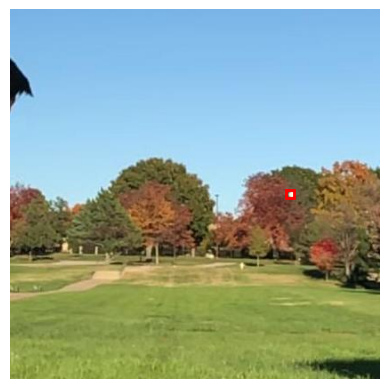

Processing 20210921_141906_jpg.rf.b560d94524dd5ddb0991a5dac91e6562.jpg and 20210921_141906_jpg.rf.b560d94524dd5ddb0991a5dac91e6562.txt


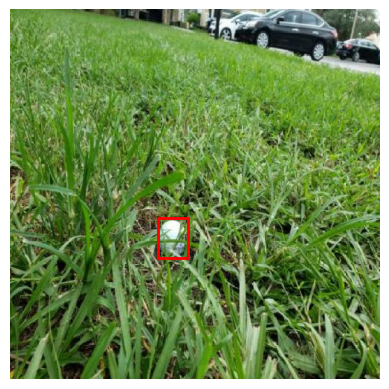

Processing 00334_00009.jpg and 00334_00009.txt


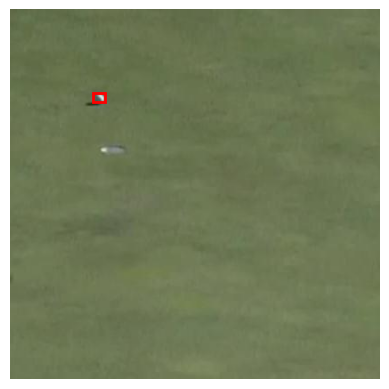

Processing 2022-09-01-113154-142_jpg.rf.59ed79512da7e25091e3b30e4c07c31e.jpg and 2022-09-01-113154-142_jpg.rf.59ed79512da7e25091e3b30e4c07c31e.txt


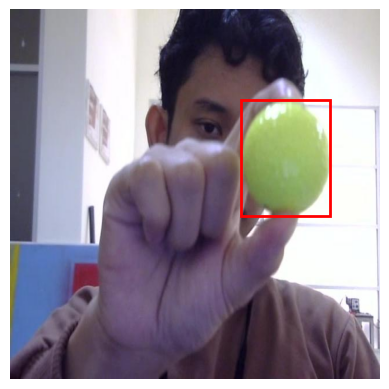

Processing images-96-_png.rf.21e5100f4fe709abf27f349b21ca7fa2.jpg and images-96-_png.rf.21e5100f4fe709abf27f349b21ca7fa2.txt


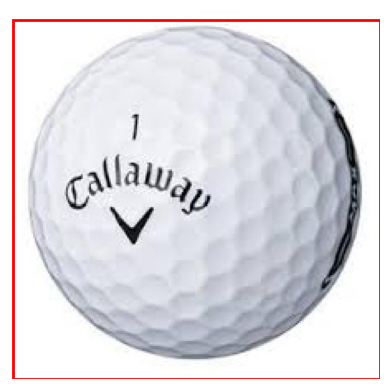

Processing 00226_00004.jpg and 00226_00004.txt


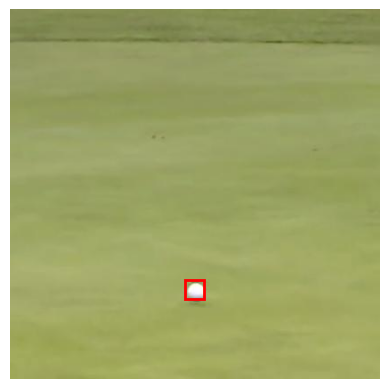

Processing Golf17_087_00006.jpg and Golf17_087_00006.txt


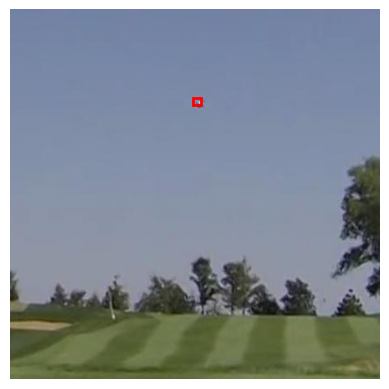

Processing Image0212_429_00008.jpg and Image0212_429_00008.txt


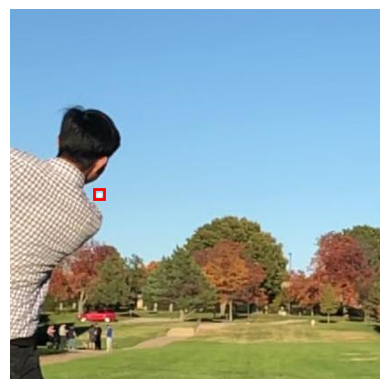

Processing 00763_00004.jpg and 00763_00004.txt


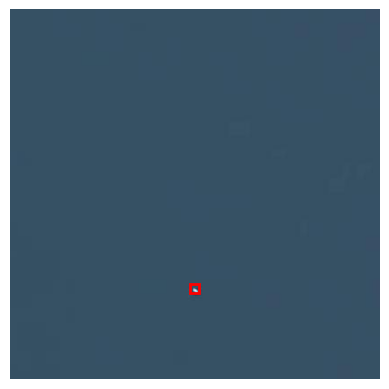

Processing 307a1549ee7375f8_jpg.rf.5312ad23a17955085cace6c37cd2bdaf.jpg and 307a1549ee7375f8_jpg.rf.5312ad23a17955085cace6c37cd2bdaf.txt


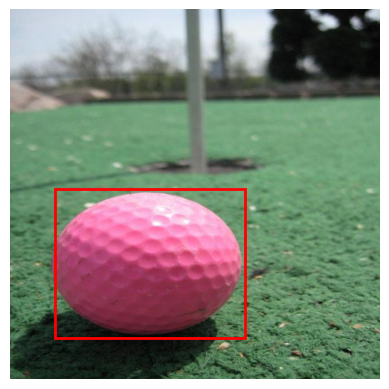

In [21]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

# YOLO 형식의 txt 파일을 읽어 바운딩 박스 정보를 추출하는 함수
def parse_yolo_txt(txt_file, img_width, img_height):
    boxes = []
    with open(txt_file, 'r') as f:
        for line in f.readlines():
            parts = line.strip().split()
            class_id = int(parts[0])
            x_center = float(parts[1])
            y_center = float(parts[2])
            width = float(parts[3])
            height = float(parts[4])

            # YOLO 형식의 값을 실제 이미지 크기로 변환
            xmin = int((x_center - width / 2) * img_width)
            ymin = int((y_center - height / 2) * img_height)
            box_width = int(width * img_width)
            box_height = int(height * img_height)

            # 바운딩 박스 정보 저장 (xmin, ymin, width, height)
            boxes.append((xmin, ymin, box_width, box_height))
    return boxes

# 바운딩 박스를 이미지 위에 그리는 함수
def draw_bounding_boxes(image_path, bounding_boxes):
    # 이미지 읽어오기
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR로 이미지를 읽으므로 RGB로 변환
    img_height, img_width, _ = image.shape

    fig, ax = plt.subplots(1)
    ax.imshow(image_rgb)

    # 바운딩 박스 그리기
    for box in bounding_boxes:
        xmin, ymin, box_width, box_height = box
        # 빨간색 테두리로 바운딩 박스 그리기
        rect = patches.Rectangle((xmin, ymin), box_width, box_height, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

    plt.axis('off')  # 축 숨기기
    plt.show()

# 이미지 폴더와 라벨 폴더에서 랜덤으로 5개의 파일을 선택하여 바운딩 박스를 그리는 함수
def process_random_images_and_labels(image_folder, label_folder, num_samples=5):
    # 이미지 폴더 내의 모든 파일 확인 (확장자가 .jpg인 파일만 처리)
    image_files = [file for file in os.listdir(image_folder) if file.endswith('.jpg')]
    
    # 이미지 파일이 충분한지 확인하고 랜덤으로 num_samples개의 파일 선택
    if len(image_files) < num_samples:
        print(f"폴더에 {num_samples}개 이상의 이미지가 없습니다.")
        return
    
    selected_images = random.sample(image_files, num_samples)

    for image_filename in selected_images:
        # 이미지 파일 이름에서 확장자를 제거하고 .txt 확장자를 붙여서 라벨 파일 경로 생성
        base_filename = os.path.splitext(image_filename)[0]
        label_filename = base_filename + '.txt'
        
        image_path = os.path.join(image_folder, image_filename)
        label_path = os.path.join(label_folder, label_filename)

        # 라벨 파일이 존재하는지 확인
        if os.path.exists(label_path):
            print(f"Processing {image_filename} and {label_filename}")
            
            # 이미지 크기 가져오기
            image = cv2.imread(image_path)
            img_height, img_width, _ = image.shape
            
            # YOLO 라벨 파일을 파싱하여 바운딩 박스 정보 추출
            bounding_boxes = parse_yolo_txt(label_path, img_width, img_height)
            
            # 바운딩 박스를 그리는 함수 호출
            draw_bounding_boxes(image_path, bounding_boxes)
        else:
            print(f"Label file for {image_filename} not found.")

# 이미지와 라벨 파일 경로 설정
image_folder = './final_split_golfball_dataset/train/images'  # 이미지 파일들이 있는 폴더 경로
label_folder = './final_split_golfball_dataset/train/labels'  # 라벨 파일들이 있는 폴더 경로

# 랜덤으로 5개의 이미지와 라벨 파일을 처리하여 바운딩 박스를 그리기
process_random_images_and_labels(image_folder, label_folder, num_samples=10)
